# <div style="text-align: right"> Назарьин Артем, НПМбд-02-19 </div>
# <center> Метод главных компонент, kNN </center>

<font size = 4> Импортируем необходимые библиотеки и инструменты: </font>

In [6]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

<font size = 4> Выгружаем и выводим датасеты с цифрами load_digits: </font>

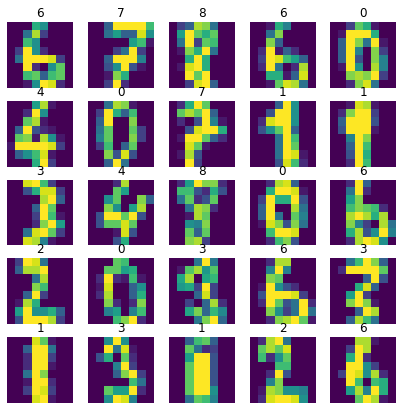

In [5]:
digits = load_digits()


X = digits['data']
labels = digits['target']

fig, axs = plt.subplots(5, 5, figsize=(7, 7))
for i in range(5):
    for j in range(5):
        k = np.random.randint(0, 1797)
        axs[i, j].imshow(X[k,:].reshape(8, 8))#, cmap='gray')
        axs[i, j].set_title(labels[k])
        axs[i, j].axis('off')


<font size = 4> 
Далее реализуем алгоритм PCA в виде класса.</font>

<font size = 4>  В <span style="color:blue">init</span>() хранится число компонент.</font>

<font size = 4>  В <span style="color:blue">fit</span>() центрируем данные: $X_c = X - \overline(X)$; </font> 
<font size = 4> считаем матрицу ковариации: $C = X_c^T \cdot X_c$;  </font> 
<font size = 4>  находим собственные векторы ($F$) и собственные значения ($\lambda$) матрицы C. </font>  

<font size = 4>  В <span style="color:blue">transform</span>() переходим в базис собственных векторов $Y = X_c \cdot F$. </font> 
    
<font size = 4>  Решаем задачу метода главных компонент в <span style="color:blue">fit_transform</span>(). </font>

In [11]:
class PCA():
    
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, X):
        X1 = X
        mean = np.mean(X1, axis = 0)
        X1 -= mean
        C = X1.T.dot(X1)
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:, ::-1]
        # _, S, Vh = np.linalg.svd(C, full_matrices = False)
        # F1, l1 = Vh.T, S
        return X1, F, l
        
    def transform(self, X, F):
        Y = X.dot(F)
        return Y

    def fit_transform(self, X):
        X_c, F, _ = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y


<font size = 4>  Посмотрим, как выглядит наш датасет на графике: каждой точке соответствует своя цифра, каждой цифре соответствует свой цвет.</font>

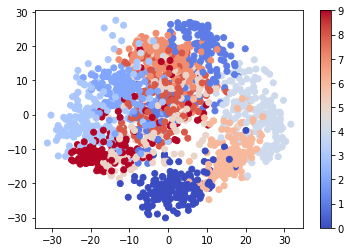

In [12]:
test = PCA(2)
Y = test.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = 'coolwarm')
plt.colorbar()

<font size = 4> Нарисуем график собственных значений матрицы ковариации и отношения их кумулятивной суммы к полной сумме. </font>

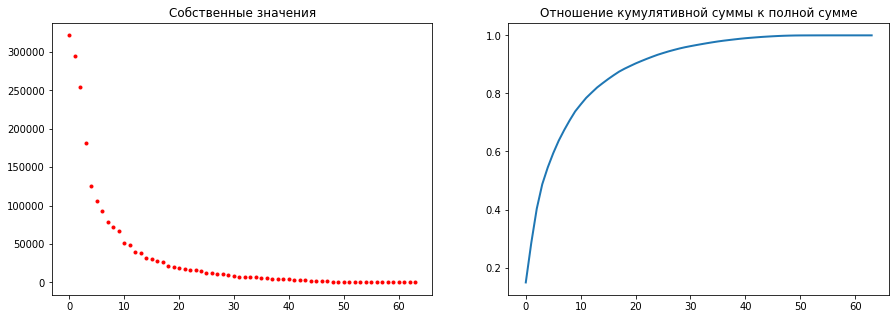

In [35]:
_, _, l = test.fit(X)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
axes[0].set_title('Собственные значения')
axes[0].plot(l, marker = '.', linestyle = '', color = 'red')
axes[1].set_title('Отношение кумулятивной суммы к полной сумме')
axes[1].plot(np.cumsum(l) / np.sum(l), linewidth=2)


<font size = 4> 
Теперь реализуем алгоритм kNN в виде класса.

В <span style="color:blue">init</span>() хранится число соседей.  
В <span style="color:blue">fit</span>() хранятся train-данные.  
В <span style="color:blue">predict</span>() программа пытается определить, к какому классу принадлежит элемент из X.  
Для начала вычисляем евклидово расстояние от тестируемой точки до точек X_train.  
Затем ищем k ближайших точек и смотрим, к какому классу они принадлежат.  
<strong> Тот класс, к которому принадлежит наибольшее число соседей и будет определен программой как класс, к которому принадлежит элемент из X. </strong> </font>

In [49]:
class kNN():
    
    def __init__(self, n_neighbours = 5):
        
        self.n_neighbours = n_neighbours
    
    def fit(self, X_train, y_train):
        
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        
        classes = list()
        for item in X: 
            dist_p = list() 
            #считаем евклидово расстояние от точки до X_train
            for j in range(len(self.X_train)):
                dist = np.linalg.norm(np.array(self.X_train[j]) - np.array(item))
                dist_p.append(dist)
            #сортируем индексы k-минимальных расстояний  
            k_indices = np.argsort(dist_p)[:self.n_neighbours] 
            #ищем соответствующие лейблы 
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            #находим класс, которому соответствует наибольшее число соседей для элемента из X при помощи Counter
            most_common = Counter(k_nearest_labels).most_common(1)
            s = most_common[0][0]
            classes.append(s)
        return classes

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42) 

<font size = 4> Определим точность вычислений алгоритма kNN при разных числах соседей от 1 до 30. без вмешательства метода главных компонент PCA </font>

In [53]:
for i in range (1, 30):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 98.33333333333333
accuracy при k = 2 : 98.33333333333333
accuracy при k = 3 : 98.88888888888889
accuracy при k = 4 : 98.70370370370371
accuracy при k = 5 : 99.07407407407408
accuracy при k = 6 : 99.07407407407408
accuracy при k = 7 : 99.07407407407408
accuracy при k = 8 : 98.70370370370371
accuracy при k = 9 : 97.77777777777777
accuracy при k = 10 : 97.96296296296296
accuracy при k = 11 : 97.96296296296296
accuracy при k = 12 : 97.77777777777777
accuracy при k = 13 : 97.77777777777777
accuracy при k = 14 : 97.96296296296296
accuracy при k = 15 : 97.77777777777777
accuracy при k = 16 : 97.77777777777777
accuracy при k = 17 : 97.77777777777777
accuracy при k = 18 : 97.77777777777777
accuracy при k = 19 : 97.4074074074074
accuracy при k = 20 : 97.4074074074074
accuracy при k = 21 : 97.4074074074074
accuracy при k = 22 : 97.4074074074074
accuracy при k = 23 : 97.22222222222221
accuracy при k = 24 : 97.03703703703704
accuracy при k = 25 : 97.03703703703704
accuracy при 

<font size = 4> Теперь уменьшим размерность данных при помощи метода главных компонент PCA и снова протестируем алгоритм kNN. </font>

In [54]:
test = PCA(2)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 62.22222222222222
accuracy при k = 2 : 62.22222222222222
accuracy при k = 3 : 62.03703703703704
accuracy при k = 4 : 64.62962962962962
accuracy при k = 5 : 64.62962962962962
accuracy при k = 6 : 65.55555555555556
accuracy при k = 7 : 64.81481481481481
accuracy при k = 8 : 66.66666666666666
accuracy при k = 9 : 65.55555555555556
accuracy при k = 10 : 66.11111111111111
accuracy при k = 11 : 66.11111111111111
accuracy при k = 12 : 65.92592592592592
accuracy при k = 13 : 64.81481481481481
accuracy при k = 14 : 66.85185185185185
accuracy при k = 15 : 67.96296296296296
accuracy при k = 16 : 67.4074074074074
accuracy при k = 17 : 67.03703703703704
accuracy при k = 18 : 67.22222222222223
accuracy при k = 19 : 66.2962962962963
accuracy при k = 20 : 66.66666666666666
accuracy при k = 21 : 66.66666666666666
accuracy при k = 22 : 67.03703703703704
accuracy при k = 23 : 66.11111111111111
accuracy при k = 24 : 66.11111111111111
accuracy при k = 25 : 65.18518518518519
accuracy пр

In [55]:
#5 главных компонент 
test = PCA(5)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 92.22222222222223
accuracy при k = 2 : 92.22222222222223
accuracy при k = 3 : 93.33333333333333
accuracy при k = 4 : 93.7037037037037
accuracy при k = 5 : 93.7037037037037
accuracy при k = 6 : 93.7037037037037
accuracy при k = 7 : 93.14814814814815
accuracy при k = 8 : 92.96296296296296
accuracy при k = 9 : 92.5925925925926
accuracy при k = 10 : 92.77777777777779
accuracy при k = 11 : 92.5925925925926
accuracy при k = 12 : 92.4074074074074
accuracy при k = 13 : 92.4074074074074
accuracy при k = 14 : 92.22222222222223
accuracy при k = 15 : 91.66666666666666
accuracy при k = 16 : 92.4074074074074
accuracy при k = 17 : 92.5925925925926
accuracy при k = 18 : 92.22222222222223
accuracy при k = 19 : 92.03703703703704
accuracy при k = 20 : 92.22222222222223
accuracy при k = 21 : 91.2962962962963
accuracy при k = 22 : 91.85185185185185
accuracy при k = 23 : 91.85185185185185
accuracy при k = 24 : 91.66666666666666
accuracy при k = 25 : 91.11111111111111
accuracy при k = 26

In [56]:
#10 главных компонент 
test = PCA(10)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 97.96296296296296
accuracy при k = 2 : 97.96296296296296
accuracy при k = 3 : 97.96296296296296
accuracy при k = 4 : 98.14814814814815
accuracy при k = 5 : 97.5925925925926
accuracy при k = 6 : 97.77777777777777
accuracy при k = 7 : 97.96296296296296
accuracy при k = 8 : 97.77777777777777
accuracy при k = 9 : 97.4074074074074
accuracy при k = 10 : 97.5925925925926
accuracy при k = 11 : 97.4074074074074
accuracy при k = 12 : 97.22222222222221
accuracy при k = 13 : 97.03703703703704
accuracy при k = 14 : 96.85185185185186
accuracy при k = 15 : 95.74074074074073
accuracy при k = 16 : 95.92592592592592
accuracy при k = 17 : 95.74074074074073
accuracy при k = 18 : 95.74074074074073
accuracy при k = 19 : 95.18518518518519
accuracy при k = 20 : 95.55555555555556
accuracy при k = 21 : 95.18518518518519
accuracy при k = 22 : 95.37037037037037
accuracy при k = 23 : 94.81481481481482
accuracy при k = 24 : 95.0
accuracy при k = 25 : 94.81481481481482
accuracy при k = 26 : 95.0

In [57]:
#15 главных компонент 
test = PCA(15)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 98.51851851851852
accuracy при k = 2 : 98.51851851851852
accuracy при k = 3 : 98.70370370370371
accuracy при k = 4 : 98.88888888888889
accuracy при k = 5 : 99.07407407407408
accuracy при k = 6 : 98.88888888888889
accuracy при k = 7 : 98.70370370370371
accuracy при k = 8 : 98.88888888888889
accuracy при k = 9 : 98.88888888888889
accuracy при k = 10 : 98.70370370370371
accuracy при k = 11 : 98.51851851851852
accuracy при k = 12 : 98.70370370370371
accuracy при k = 13 : 98.51851851851852
accuracy при k = 14 : 98.14814814814815
accuracy при k = 15 : 98.14814814814815
accuracy при k = 16 : 97.96296296296296
accuracy при k = 17 : 97.77777777777777
accuracy при k = 18 : 97.5925925925926
accuracy при k = 19 : 97.22222222222221
accuracy при k = 20 : 97.4074074074074
accuracy при k = 21 : 97.22222222222221
accuracy при k = 22 : 97.03703703703704
accuracy при k = 23 : 97.22222222222221
accuracy при k = 24 : 97.03703703703704
accuracy при k = 25 : 96.66666666666667
accuracy пр

In [58]:
#20 главных компонент 
test = PCA(20)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 98.33333333333333
accuracy при k = 2 : 98.33333333333333
accuracy при k = 3 : 98.88888888888889
accuracy при k = 4 : 98.88888888888889
accuracy при k = 5 : 99.07407407407408
accuracy при k = 6 : 98.88888888888889
accuracy при k = 7 : 98.88888888888889
accuracy при k = 8 : 99.07407407407408
accuracy при k = 9 : 98.88888888888889
accuracy при k = 10 : 99.07407407407408
accuracy при k = 11 : 98.51851851851852
accuracy при k = 12 : 98.88888888888889
accuracy при k = 13 : 98.51851851851852
accuracy при k = 14 : 98.51851851851852
accuracy при k = 15 : 97.77777777777777
accuracy при k = 16 : 97.77777777777777
accuracy при k = 17 : 97.77777777777777
accuracy при k = 18 : 97.4074074074074
accuracy при k = 19 : 97.22222222222221
accuracy при k = 20 : 97.22222222222221
accuracy при k = 21 : 97.22222222222221
accuracy при k = 22 : 97.22222222222221
accuracy при k = 23 : 97.03703703703704
accuracy при k = 24 : 96.66666666666667
accuracy при k = 25 : 96.66666666666667
accuracy п

In [59]:
#30 главных компонент 
test = PCA(30)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 98.70370370370371
accuracy при k = 2 : 98.70370370370371
accuracy при k = 3 : 98.70370370370371
accuracy при k = 4 : 98.88888888888889
accuracy при k = 5 : 98.70370370370371
accuracy при k = 6 : 99.07407407407408
accuracy при k = 7 : 98.70370370370371
accuracy при k = 8 : 98.88888888888889
accuracy при k = 9 : 98.51851851851852
accuracy при k = 10 : 98.70370370370371
accuracy при k = 11 : 98.33333333333333
accuracy при k = 12 : 97.96296296296296
accuracy при k = 13 : 97.77777777777777
accuracy при k = 14 : 97.77777777777777
accuracy при k = 15 : 97.5925925925926
accuracy при k = 16 : 97.4074074074074
accuracy при k = 17 : 97.4074074074074
accuracy при k = 18 : 97.5925925925926
accuracy при k = 19 : 97.5925925925926
accuracy при k = 20 : 97.5925925925926
accuracy при k = 21 : 97.22222222222221
accuracy при k = 22 : 97.4074074074074
accuracy при k = 23 : 97.03703703703704
accuracy при k = 24 : 96.85185185185186
accuracy при k = 25 : 96.66666666666667
accuracy при k =

In [60]:
#40 главных компонент 
test = PCA(40)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 98.51851851851852
accuracy при k = 2 : 98.51851851851852
accuracy при k = 3 : 98.70370370370371
accuracy при k = 4 : 98.88888888888889
accuracy при k = 5 : 98.88888888888889
accuracy при k = 6 : 99.07407407407408
accuracy при k = 7 : 98.88888888888889
accuracy при k = 8 : 98.88888888888889
accuracy при k = 9 : 98.33333333333333
accuracy при k = 10 : 98.33333333333333
accuracy при k = 11 : 98.14814814814815
accuracy при k = 12 : 97.77777777777777
accuracy при k = 13 : 97.77777777777777
accuracy при k = 14 : 97.96296296296296
accuracy при k = 15 : 97.96296296296296
accuracy при k = 16 : 97.77777777777777
accuracy при k = 17 : 97.5925925925926
accuracy при k = 18 : 97.77777777777777
accuracy при k = 19 : 97.4074074074074
accuracy при k = 20 : 97.5925925925926
accuracy при k = 21 : 97.4074074074074
accuracy при k = 22 : 97.5925925925926
accuracy при k = 23 : 97.03703703703704
accuracy при k = 24 : 97.03703703703704
accuracy при k = 25 : 97.03703703703704
accuracy при k

In [61]:
#50 главных компонент 
test = PCA(50)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 98.33333333333333
accuracy при k = 2 : 98.33333333333333
accuracy при k = 3 : 98.88888888888889
accuracy при k = 4 : 98.70370370370371
accuracy при k = 5 : 99.07407407407408
accuracy при k = 6 : 99.07407407407408
accuracy при k = 7 : 99.07407407407408
accuracy при k = 8 : 98.70370370370371
accuracy при k = 9 : 97.96296296296296
accuracy при k = 10 : 97.96296296296296
accuracy при k = 11 : 97.96296296296296
accuracy при k = 12 : 97.77777777777777
accuracy при k = 13 : 97.77777777777777
accuracy при k = 14 : 97.96296296296296
accuracy при k = 15 : 97.96296296296296
accuracy при k = 16 : 97.77777777777777
accuracy при k = 17 : 97.77777777777777
accuracy при k = 18 : 97.77777777777777
accuracy при k = 19 : 97.4074074074074
accuracy при k = 20 : 97.4074074074074
accuracy при k = 21 : 97.4074074074074
accuracy при k = 22 : 97.4074074074074
accuracy при k = 23 : 97.22222222222221
accuracy при k = 24 : 97.03703703703704
accuracy при k = 25 : 96.85185185185186
accuracy при 

In [62]:
#60 главных компонент 
test = PCA(60)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 98.33333333333333
accuracy при k = 2 : 98.33333333333333
accuracy при k = 3 : 98.88888888888889
accuracy при k = 4 : 98.70370370370371
accuracy при k = 5 : 99.07407407407408
accuracy при k = 6 : 99.07407407407408
accuracy при k = 7 : 99.07407407407408
accuracy при k = 8 : 98.70370370370371
accuracy при k = 9 : 97.77777777777777
accuracy при k = 10 : 97.96296296296296
accuracy при k = 11 : 97.96296296296296
accuracy при k = 12 : 97.77777777777777
accuracy при k = 13 : 97.77777777777777
accuracy при k = 14 : 97.96296296296296
accuracy при k = 15 : 97.96296296296296
accuracy при k = 16 : 97.77777777777777
accuracy при k = 17 : 97.77777777777777
accuracy при k = 18 : 97.77777777777777
accuracy при k = 19 : 97.4074074074074
accuracy при k = 20 : 97.5925925925926
accuracy при k = 21 : 97.4074074074074
accuracy при k = 22 : 97.4074074074074
accuracy при k = 23 : 97.22222222222221
accuracy при k = 24 : 97.03703703703704
accuracy при k = 25 : 96.85185185185186
accuracy при 

In [63]:
#64 главные компоненты 
test = PCA(64)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size=0.3, random_state=42) 

for i in range (1, 31):
    a = kNN(i)
    a.fit(X_train, y_train)
    classes = a.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("accuracy при k =", i, ":", accuracy)

accuracy при k = 1 : 98.33333333333333
accuracy при k = 2 : 98.33333333333333
accuracy при k = 3 : 98.88888888888889
accuracy при k = 4 : 98.70370370370371
accuracy при k = 5 : 99.07407407407408
accuracy при k = 6 : 99.07407407407408
accuracy при k = 7 : 99.07407407407408
accuracy при k = 8 : 98.70370370370371
accuracy при k = 9 : 97.96296296296296
accuracy при k = 10 : 97.96296296296296
accuracy при k = 11 : 97.96296296296296
accuracy при k = 12 : 97.77777777777777
accuracy при k = 13 : 97.77777777777777
accuracy при k = 14 : 97.96296296296296
accuracy при k = 15 : 97.77777777777777
accuracy при k = 16 : 97.77777777777777
accuracy при k = 17 : 97.77777777777777
accuracy при k = 18 : 97.77777777777777
accuracy при k = 19 : 97.4074074074074
accuracy при k = 20 : 97.4074074074074
accuracy при k = 21 : 97.4074074074074
accuracy при k = 22 : 97.4074074074074
accuracy при k = 23 : 97.22222222222221
accuracy при k = 24 : 97.03703703703704
accuracy при k = 25 : 97.03703703703704
accuracy при 